 **Change Runtime type to T4 GPU**


In [74]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Install required packages**

In [75]:
!pip install 'scanpy[leiden]'

**Import Packages**

In [76]:
import scanpy as sc
import numpy as np
import pandas as pd

**Read in Anndata object**

Read in the data using scanpy a python  package for designed specifically for single cell data to create AnnData objects.

hda5 file - this file allows for easy access and analysis of very large datasets. Ordinarilly, it might be be more time consuming to perform certain tasks, however, this file format makes those tasks alot quicker

In [77]:
hu = sc.read_h5ad('/content/drive/MyDrive/Applied_Statistics_and_Data_Science_University_of_Manchester/data/Hufallopiantube.h5ad')

**View data structure**

In [78]:
hu.layers["counts"] = hu.X.copy()

In [79]:
hu.obs

Patient   Author                       Tissue Disease_stage Age
CellID                                                                       
sc_b1_A08       33572  Hu_2020  Benign fallopian tube cells        Benign  64
sc_b1_B06       34350  Hu_2020  Benign fallopian tube cells        Benign  50
sc_b1_B08       34350  Hu_2020  Benign fallopian tube cells        Benign  50
sc_b1_B11       34350  Hu_2020  Benign fallopian tube cells        Benign  50
sc_b1_C15       34350  Hu_2020  Benign fallopian tube cells        Benign  50
...               ...      ...                          ...           ...  ..
15072R-p1-B17   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1  62
15072R-p1-B18   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1  62
15072R-p1-C01   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1  62
15072R-p1-C02   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1  62
15072R-p1-C03   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1  62

[4557 rows x 5 columns]

**Check the various tissues in the dataset**

In [80]:
# Assess the structure of the data

# Dimensions of the table

print("\n## Dimensions of the data table##")
print("(rows, columns)", hu.obs.shape)

print("\n## Check rows alone ##")
print(hu.obs.columns)

print("\n## Check columns alone ##")
#print(hu.obs.rows) # There are rows

# View unique entries for certain columns

print("\n## Unique disease stages ##")
print(hu.obs['Disease_stage'].unique())

print("\n## Unique tissue types ##")
print(hu.obs['Tissue'].unique())

print("\n## Unique Ages ##")
print(hu.obs['Age'].unique())

# convert column to numeric
hu.obs['Age'] = pd.to_numeric(hu.obs['Age'])

print("\n ## Age range of patients ##")
print("max: ",hu.obs['Age'].min())
print("min: ",hu.obs['Age'].max())
print("range: ", hu.obs['Age'].max() - hu.obs['Age'].min())


## Dimensions of the data table##
(rows, columns) (4557, 5)

## Check rows alone ##
Index(['Patient', 'Author', 'Tissue', 'Disease_stage', 'Age'], dtype='object')

## Check columns alone ##

## Unique disease stages ##
['Benign', 'IV', 'I', 'IIIc', 'IIIc1']
Categories (5, object): ['Benign', 'I', 'IIIc', 'IIIc1', 'IV']

## Unique tissue types ##
['Benign fallopian tube cells', 'HGSOC fallopian tube cells']
Categories (2, object): ['Benign fallopian tube cells', 'HGSOC fallopian tube cells']

## Unique Ages ##
['64', '50', '45', '55', '53', '73', '66', '52', '77', '62']
Categories (10, object): ['45', '50', '52', '53', ..., '64', '66', '73', '77']

 ## Age range of patients ##
max:  45
min:  77
range:  32


In [81]:
print("\nGet column names")
print(hu.var.columns) # No columns showing

print("\nLength of pandas dataframe:")
print(len(hu.var))


Get column names
Index([], dtype='object')

Length of pandas dataframe:
22109


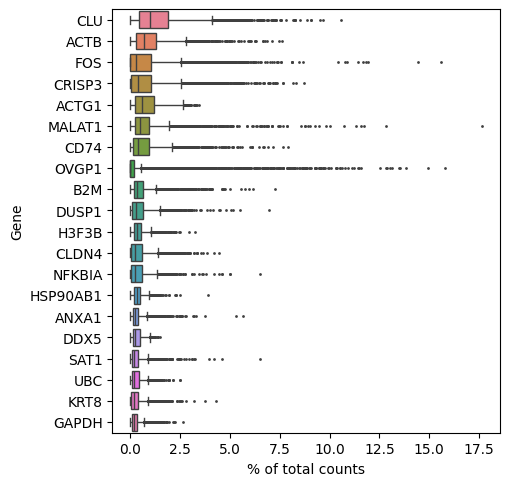

In [82]:
sc.pl.highest_expr_genes(hu, n_top=20)

#Quality Control

**Get the Total number of genes and cells**

In [83]:
# Check the total number of genes
print("Total number of genes: ", len(hu.var.index))

# Check the total number of cells
print("Total number of cells: ", hu.obs.shape[0])

Total number of genes:  22109
Total number of cells:  4557


**Create another variable for the data in order to carry out QC comparison**

In [84]:
data_original = hu.copy()

**I will adopt a 1% rule**

**The minimum number of genes to be found in each cell should be equal to 1% of the total genes (221)**

**The minimum number of cells in possessing all genes should be equal to 1% of the total number of cells- (45)**

In [85]:
# 10% of the gene count
gene_value = len(hu.var.index) * 0.01
print("10% of genes amount to: ", gene_value)

# 10% of the cell count
cell_value = hu.obs.shape[0] * 0.01
print("10% of cells amount to: ", cell_value)


sc.pp.filter_cells(hu, min_genes= gene_value)
sc.pp.filter_genes(hu, min_cells= cell_value)

sc.pp.filter_cells(data_original, min_genes= 0)
sc.pp.filter_genes(data_original, min_cells= 1)

# Original
#sc.pp.filter_cells(hu, min_genes= 100)
#sc.pp.filter_genes(hu, min_cells= 3)

10% of genes amount to:  221.09
10% of cells amount to:  45.57


**Check the number of genes and cells again after filtration**

In [86]:
# Check the total number of genes
# Check the total number of cells
print("Total number of cells in filtered dataset: ", hu.obs.shape[0])
print("Total number of genes in filtered dataset: ", len(hu.var.index))
print("\n")
print("Total number of cells in orginal: ", data_original.obs.shape[0])
print("Total number of genes in original: ", len(data_original.var.index))


Total number of cells in filtered dataset:  4557
Total number of genes in filtered dataset:  15470


Total number of cells in orginal:  4557
Total number of genes in original:  21568


**Calculate quality metrics**

In [87]:
sc.pp.calculate_qc_metrics(hu,inplace=True, log1p=False, )
sc.pp.calculate_qc_metrics(data_original,inplace=True, log1p=False, )

In [88]:
# Range of values in n_genes_by_counts
print("min: ",hu.obs['n_genes_by_counts'].min())
print("max: ",hu.obs['n_genes_by_counts'].max())

min:  981
max:  7446


In [89]:
# Range of values in n_genes
print("min: ",hu.obs['n_genes'].min())
print("max: ",hu.obs['n_genes'].max())

min:  1003
max:  7496


**View the effects of filtration on the data structure**

In [90]:
hu.obs

Patient   Author                       Tissue Disease_stage  \
CellID                                                                      
sc_b1_A08       33572  Hu_2020  Benign fallopian tube cells        Benign   
sc_b1_B06       34350  Hu_2020  Benign fallopian tube cells        Benign   
sc_b1_B08       34350  Hu_2020  Benign fallopian tube cells        Benign   
sc_b1_B11       34350  Hu_2020  Benign fallopian tube cells        Benign   
sc_b1_C15       34350  Hu_2020  Benign fallopian tube cells        Benign   
...               ...      ...                          ...           ...   
15072R-p1-B17   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1   
15072R-p1-B18   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1   
15072R-p1-C01   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1   
15072R-p1-C02   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1   
15072R-p1-C03   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1   

               Age  n_genes  n_genes_by_counts  total_counts  \
CellID                                                         
sc_b1_A08       64     1326               1321      141968.0   
sc_b1_B06       50     1599               1596      273205.0   
sc_b1_B08       50     2298               2292      192946.0   
sc_b1_B11       50     2100               2088      195011.0   
sc_b1_C15       50     1793               1782      279014.0   
...            ...      ...                ...           ...   
15072R-p1-B17   62     1640               1637     1097429.0   
15072R-p1-B18   62     1272               1264      844222.0   
15072R-p1-C01   62     2517               2505      496848.0   
15072R-p1-C02   62     2439               2433      284156.0   
15072R-p1-C03   62     3378               3368      232391.0   

               pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
CellID                                                                   
sc_b1_A08                       24.113885                    36.683619   
sc_b1_B06                       25.746235                    34.626379   
sc_b1_B08                       24.967089                    32.273279   
sc_b1_B11                       20.915230                    29.310141   
sc_b1_C15                       19.805458                    27.781402   
...                                   ...                          ...   
15072R-p1-B17                   24.463542                    34.992241   
15072R-p1-B18                   20.539621                    31.182793   
15072R-p1-C01                   25.454264                    33.305760   
15072R-p1-C02                   24.345430                    32.970270   
15072R-p1-C03                   20.507679                    27.861234   

               pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  
CellID                                                                   
sc_b1_A08                        55.302603                    86.775189  
sc_b1_B06                        47.678117                    74.242419  
sc_b1_B08                        42.510340                    62.930561  
sc_b1_B11                        41.774567                    66.977760  
sc_b1_C15                        39.977205                    66.623180  
...                                    ...                          ...  
15072R-p1-B17                    48.658455                    72.269094  
15072R-p1-B18                    46.952697                    78.284977  
15072R-p1-C01                    43.796091                    62.589766  
15072R-p1-C02                    44.493518                    64.000760  
15072R-p1-C03                    37.192490                    54.848510  

[4557 rows x 12 columns]

In [91]:
hu.var

n_cells  n_cells_by_counts  mean_counts  pct_dropout_by_counts  \
Gene                                                                           
WASH7P            156                156     0.052227              96.576695   
LOC729737         152                152     0.433619              96.664472   
LOC100133331      115                115     0.162388              97.476410   
LOC100288069      313                313     0.450735              93.131446   
LINC00115         164                164     0.935264              96.401141   
...               ...                ...          ...                    ...   
PRKY               67                 67     0.031819              98.529734   
USP9Y              48                 48     0.010972              98.946675   
DDX3Y              56                 56     0.019311              98.771121   
UTY                55                 55     0.018214              98.793066   
CD24             3464               3464   291.605223              23.985078   

              total_counts  
Gene                        
WASH7P               238.0  
LOC729737           1976.0  
LOC100133331         740.0  
LOC100288069        2054.0  
LINC00115           4262.0  
...                    ...  
PRKY                 145.0  
USP9Y                 50.0  
DDX3Y                 88.0  
UTY                   83.0  
CD24             1328845.0  

[15470 rows x 5 columns]

**The distribution of n_genes_by_counts and total_counts**

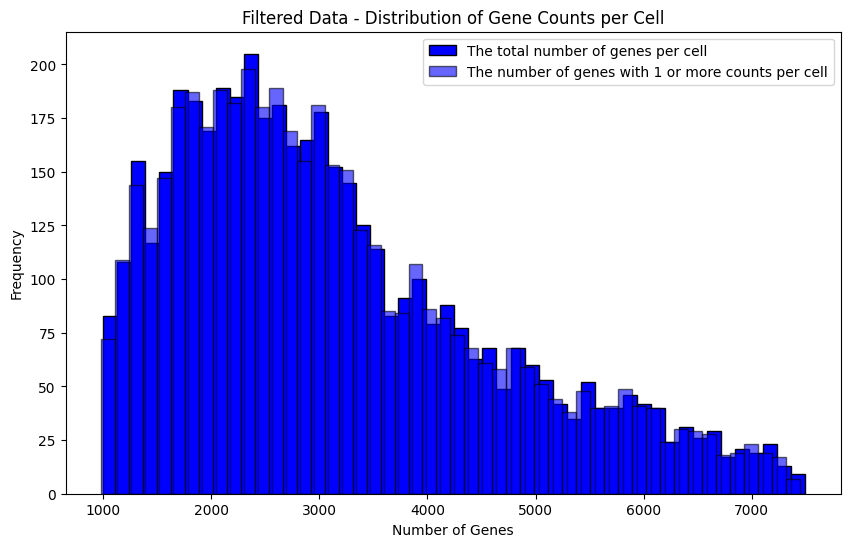

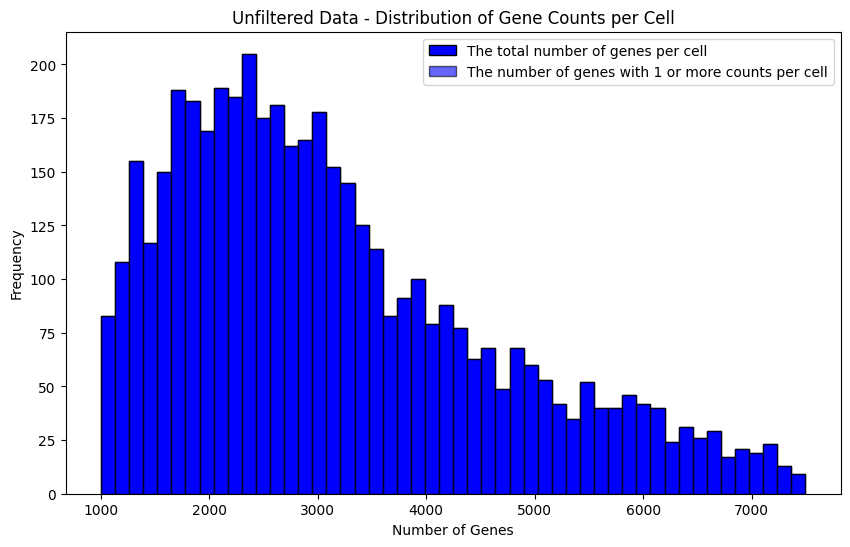

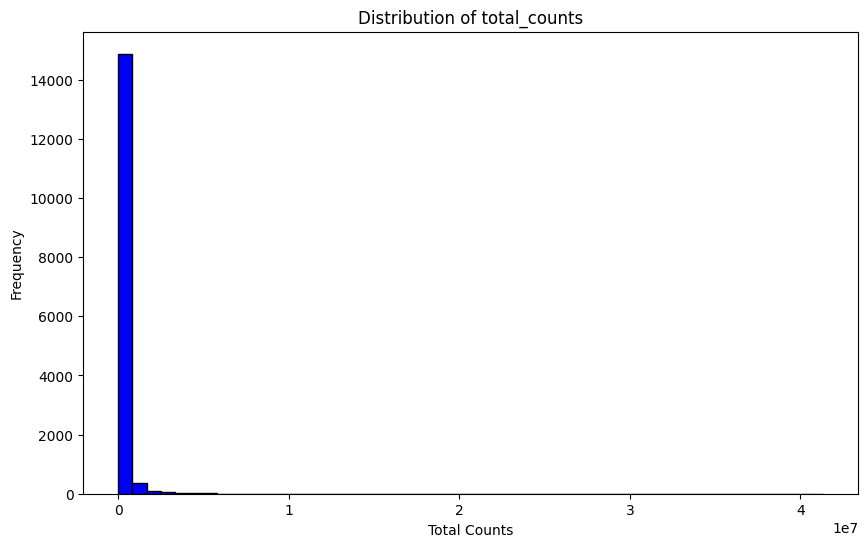

In [92]:
import matplotlib.pyplot as plt

# Plot of the distribution of n_genes_by_counts in hu.obs and the distribution of total_counts in hu.var
# using a histogram with appropriately sized bins.

plt.figure(figsize=(10, 6))

# Histogram for n_genes with transparency
plt.hist(hu.obs['n_genes'], bins=50, edgecolor='black', alpha=1, label='The total number of genes per cell')

# Histogram for n_genes_by_counts with transparency
plt.hist(hu.obs['n_genes_by_counts'], bins=50, edgecolor='black', alpha=0.6, label='The number of genes with 1 or more counts per cell')

plt.xlabel('Number of Genes')
plt.ylabel('Frequency')
plt.title('Filtered Data - Distribution of Gene Counts per Cell')
plt.legend()  # Add a legend to distinguish the histograms
plt.show()

plt.figure(figsize=(10, 6))

# Histogram for n_genes with transparency
plt.hist(data_original.obs['n_genes'], bins=50, edgecolor='black', alpha=1, label='The total number of genes per cell')

# Histogram for n_genes_by_counts with transparency
plt.hist(data_original.obs['n_genes_by_counts'], bins=50, edgecolor='black', alpha=0.6, label='The number of genes with 1 or more counts per cell')

plt.xlabel('Number of Genes')
plt.ylabel('Frequency')
plt.title('Unfiltered Data - Distribution of Gene Counts per Cell')
plt.legend()  # Add a legend to distinguish the histograms
plt.show()

######

# A histogram of total counts
plt.figure(figsize=(10, 6))
plt.hist(hu.var['total_counts'], bins=50, edgecolor='black')
plt.xlabel('Total Counts')
plt.ylabel('Frequency')
plt.title('Distribution of total_counts')
plt.show()

Reflection: The figure entitled, "Unfiltered Data - Distribution of Gene Counts per Cell" shows that there is zero difference between total genes and genes with at least one count in a cell. As a result the histogram bin colour is a blend of the blue and gold colours in the legend.

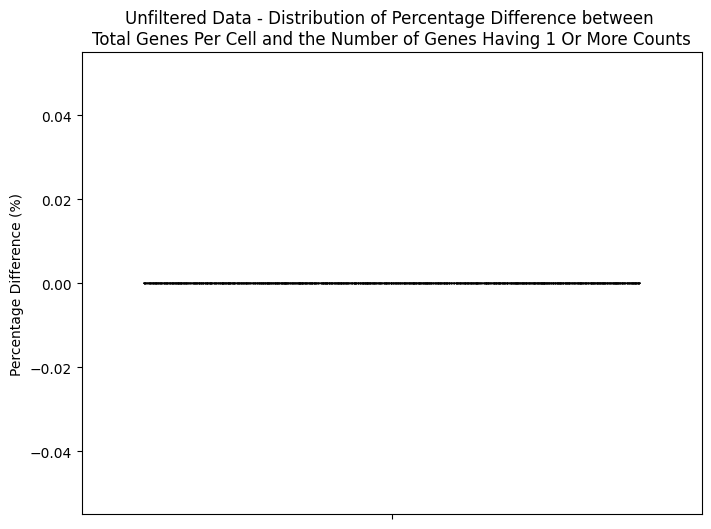

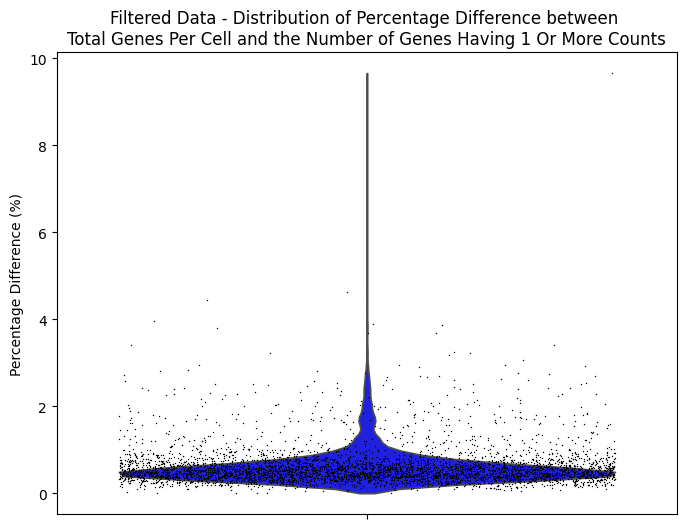

In [93]:
# Calculate the percentage difference
data_original.obs['percentage_difference'] = (data_original.obs['n_genes'] - data_original.obs['n_genes_by_counts']) / data_original.obs['n_genes'] * 100

# Create a violin plot
fig, ax = plt.subplots(figsize=(8, 6))
sc.pl.violin(data_original, ['percentage_difference'], jitter=0.4, ax=ax, show=False)
plt.ylabel('Percentage Difference (%)')
plt.title('Unfiltered Data - Distribution of Percentage Difference between \nTotal Genes Per Cell and the Number of Genes Having 1 Or More Counts')
ax.set_xticklabels([])  # Remove x-axis tick labels
plt.show()

##

# Calculate the percentage difference
hu.obs['percentage_difference'] = (hu.obs['n_genes'] - hu.obs['n_genes_by_counts']) / hu.obs['n_genes'] * 100

# Create a violin plot
fig, ax = plt.subplots(figsize=(8, 6))
sc.pl.violin(hu, ['percentage_difference'], jitter=0.4, ax=ax, show=False)
plt.ylabel('Percentage Difference (%)')
plt.title('Filtered Data - Distribution of Percentage Difference between \nTotal Genes Per Cell and the Number of Genes Having 1 Or More Counts')
ax.set_xticklabels([])  # Remove x-axis tick labels
plt.show()

**Assessment of the percentage dropout of genes across all cells - similar to the violin plot just above**

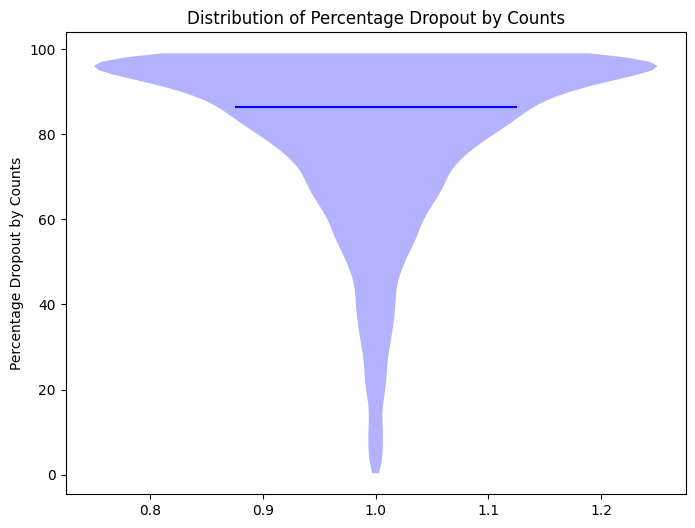

In [94]:
# Plot a violin plot of the dropout rate in hu.var
fig, ax = plt.subplots(figsize=(8, 6))
# Access 'pct_dropout_by_counts' from hu.var directly
ax.violinplot(hu.var['pct_dropout_by_counts'], showmeans=False, showmedians=True, showextrema=False)
plt.ylabel('Percentage Dropout by Counts')  # Adjust y-axis label
plt.title('Distribution of Percentage Dropout by Counts')  # Adjust title
plt.show()

Text(0, 0.5, 'Frequency')

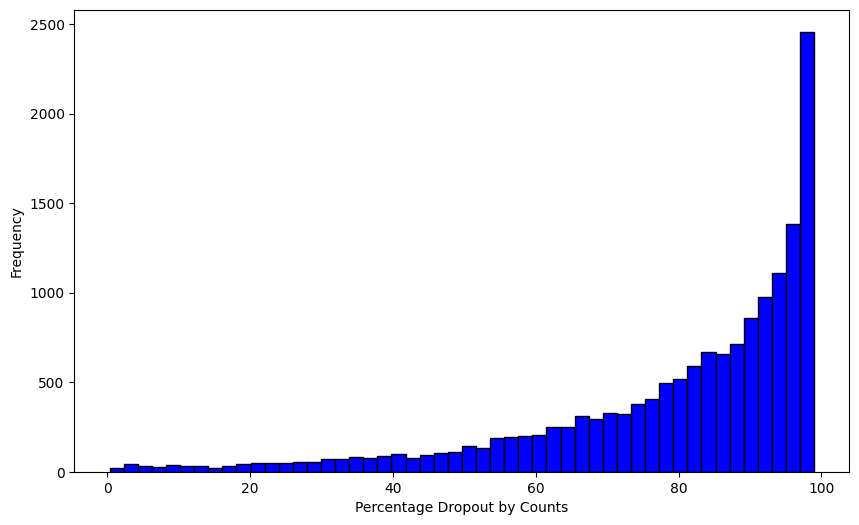

In [95]:
# Draw a histogram of the dropout rate
plt.figure(figsize=(10, 6))
plt.hist(hu.var['pct_dropout_by_counts'], bins=50, edgecolor='black')
plt.xlabel('Percentage Dropout by Counts')
plt.ylabel('Frequency')

In [96]:
print(hu.var['pct_dropout_by_counts'].head())

print("\n")

print(hu.var['pct_dropout_by_counts'].describe())

Gene
WASH7P          96.576695
LOC729737       96.664472
LOC100133331    97.476410
LOC100288069    93.131446
LINC00115       96.401141
Name: pct_dropout_by_counts, dtype: float64


count    15470.000000
mean        79.691735
std         20.235478
min          0.329164
25%         70.879965
50%         86.438446
75%         94.996708
max         98.990564
Name: pct_dropout_by_counts, dtype: float64


In [97]:
# Percentage of genes which have over 85% dropout rate across all cells
sum(hu.var['pct_dropout_by_counts'] > 85) / len(hu.var)

# median dropout rate
hu.var['pct_dropout_by_counts'].median()

86.43844634628046

**Filter the cells further by slicing the anndata object on 'n_genes_by_counts' <6000 and 'total_counts' <15000**

In [98]:
data=hu[hu.obs.n_genes_by_counts <6000,:]
data=data[data.obs.n_genes_by_counts <15000,:]

**View the structure of the data after filtering steps**

In [99]:
data.obs

Patient   Author                       Tissue Disease_stage  \
CellID                                                                      
sc_b1_A08       33572  Hu_2020  Benign fallopian tube cells        Benign   
sc_b1_B06       34350  Hu_2020  Benign fallopian tube cells        Benign   
sc_b1_B08       34350  Hu_2020  Benign fallopian tube cells        Benign   
sc_b1_B11       34350  Hu_2020  Benign fallopian tube cells        Benign   
sc_b1_C15       34350  Hu_2020  Benign fallopian tube cells        Benign   
...               ...      ...                          ...           ...   
15072R-p1-B17   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1   
15072R-p1-B18   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1   
15072R-p1-C01   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1   
15072R-p1-C02   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1   
15072R-p1-C03   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1   

               Age  n_genes  n_genes_by_counts  total_counts  \
CellID                                                         
sc_b1_A08       64     1326               1321      141968.0   
sc_b1_B06       50     1599               1596      273205.0   
sc_b1_B08       50     2298               2292      192946.0   
sc_b1_B11       50     2100               2088      195011.0   
sc_b1_C15       50     1793               1782      279014.0   
...            ...      ...                ...           ...   
15072R-p1-B17   62     1640               1637     1097429.0   
15072R-p1-B18   62     1272               1264      844222.0   
15072R-p1-C01   62     2517               2505      496848.0   
15072R-p1-C02   62     2439               2433      284156.0   
15072R-p1-C03   62     3378               3368      232391.0   

               pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
CellID                                                                   
sc_b1_A08                       24.113885                    36.683619   
sc_b1_B06                       25.746235                    34.626379   
sc_b1_B08                       24.967089                    32.273279   
sc_b1_B11                       20.915230                    29.310141   
sc_b1_C15                       19.805458                    27.781402   
...                                   ...                          ...   
15072R-p1-B17                   24.463542                    34.992241   
15072R-p1-B18                   20.539621                    31.182793   
15072R-p1-C01                   25.454264                    33.305760   
15072R-p1-C02                   24.345430                    32.970270   
15072R-p1-C03                   20.507679                    27.861234   

               pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
CellID                                                                    
sc_b1_A08                        55.302603                    86.775189   
sc_b1_B06                        47.678117                    74.242419   
sc_b1_B08                        42.510340                    62.930561   
sc_b1_B11                        41.774567                    66.977760   
sc_b1_C15                        39.977205                    66.623180   
...                                    ...                          ...   
15072R-p1-B17                    48.658455                    72.269094   
15072R-p1-B18                    46.952697                    78.284977   
15072R-p1-C01                    43.796091                    62.589766   
15072R-p1-C02                    44.493518                    64.000760   
15072R-p1-C03                    37.192490                    54.848510   

               percentage_difference  
CellID                                
sc_b1_A08                   0.377074  
sc_b1_B06                   0.187617  
sc_b1_B08                   0.261097  
sc_b1_B11                   0.571429  
sc_b1_

# **Dimensionality Reduction & UMAP Clustering**

****Normalise and log transform the data****

In [100]:
sc.pp.normalize_total(data, target_sum=1e4)
sc.pp.log1p(data)

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


**Crop the data to highly variable genes only**

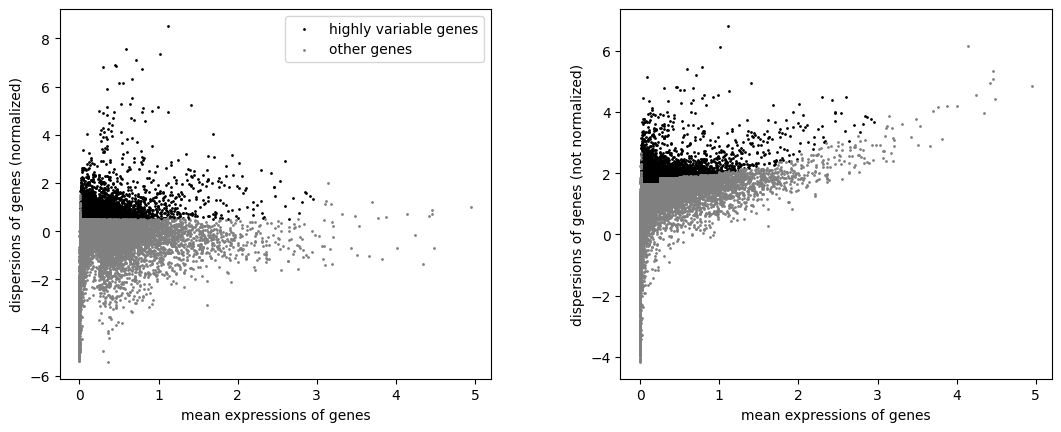

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [101]:
# Here scanpy's default filtration parameters filter out samples that are not
# as highly variable and may have insignificant differential expression.
sc.pp.highly_variable_genes(data, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(data)
# Change the default color in Matplotlib
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['blue'])  # Example: Set to blue
data.raw = data
data = data [:, data.var.highly_variable]
sc.pp.scale(data, max_value=10)

**Calculate and plot a principal component analysis (PCA) elbow plot**

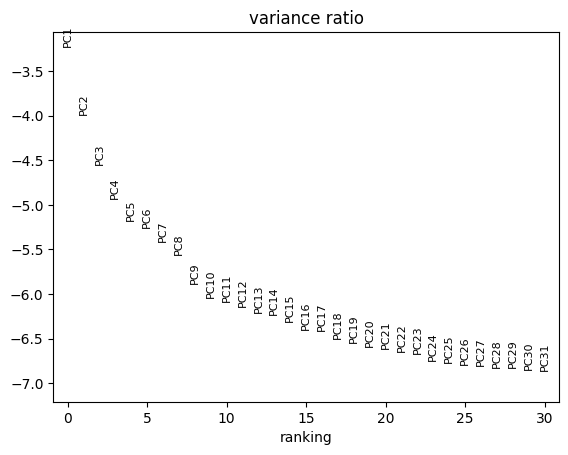

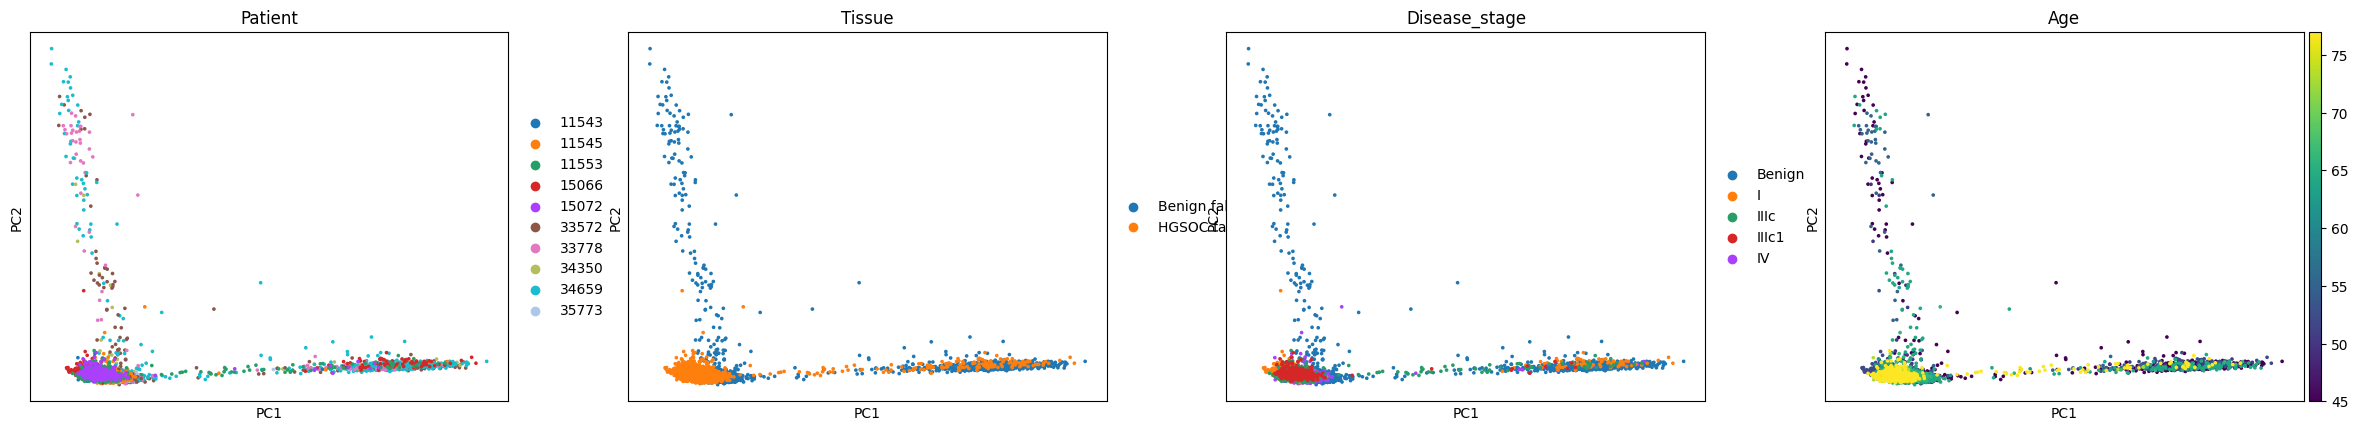

In [102]:
# The scree plot helps us to choose which PCs are the most significant
sc.tl.pca(data, svd_solver='arpack')
sc.pl.pca_variance_ratio(data, log=True)
sc.pl.pca(data, color=['Patient', 'Tissue', 'Disease_stage', 'Age'])

Note:
The first 8 principal components will be considered for use because it is the ninth principal component which has the significant drop.

--- scree plot explanation ---

**The scree plot represent eigenvalues for each principal component.**
**The eigenvalues (or explained variance) which is a measure of variability that each PC captures.**
**The greater the eigenvalue the more it explains and the more important it is.**
**The point at which the greatest distance is between eigenvalues is the point at which to determine which eignvalues or PCs to consider for further analysis.**


The PCA coloured by Disease stages reveals the cluster of cells associated with late stage cancer, namely red and purple.
The PCA coloured by Age reveals that age strongly correlates with disease stage.

**Check data structure after filtration for the most differentially expressed genes**

In [103]:
data.var

n_cells  n_cells_by_counts  mean_counts  pct_dropout_by_counts  \
Gene                                                                       
PLEKHN1       127                127     1.582620              97.213079   
C1orf159      383                383    11.393461              91.595348   
SCNN1D        329                329     7.168751              92.780338   
PUSL1         425                425    13.996269              90.673689   
MXRA8         147                147     4.545315              96.774194   
...           ...                ...          ...                    ...   
TAZ           430                430     9.476629              90.563968   
PLXNA3        276                276     6.520518              93.943384   
UBL4A         471                471    16.304367              89.664253   
MPP1          613                613    23.767391              86.548168   
F8            228                228     8.001756              94.996708   

          total_counts  highly_variable     means  dispersions  \
Gene                                                             
PLEKHN1         7212.0             True  0.018621     1.803807   
C1orf159       51920.0             True  0.149982     1.668599   
SCNN1D         32668.0             True  0.107639     1.670837   
PUSL1          63781.0             True  0.161461     2.026436   
MXRA8          20713.0             True  0.065345     2.215176   
...                ...              ...       ...          ...   
TAZ            43185.0             True  0.138826     1.762345   
PLXNA3         29714.0             True  0.108467     1.782197   
UBL4A          74299.0             True  0.195770     2.008622   
MPP1          108308.0             True  0.310304     1.909158   
F8             36464.0             True  0.113225     2.076832   

          dispersions_norm      mean       std  
Gene                                            
PLEKHN1           0.659170  0.009426  0.097325  
C1orf159          0.521724  0.065583  0.302284  
SCNN1D            0.523998  0.046780  0.252958  
PUSL1             0.885482  0.073212  0.310120  
MXRA8             1.077347  0.024063  0.192787  
...                    ...       ...       ...  
TAZ               0.617021  0.065907  0.283159  
PLXNA3            0.637202  0.047324  0.253490  
UBL4A             0.867375  0.083141  0.342405  
MPP1              0.643104  0.139589  0.441070  
F8                0.936713  0.045477  0.256983  

[4240 rows x 11 columns]

**Compute the nearest neighbours graph, choose the number of principal components to use based on the elbow of the PCA plot (inflection point)**

In [104]:
sc.pp.neighbors(data, n_pcs=8)

**Compute the UMAP**

In [105]:
sc.tl.umap(data)

**Plot the UMAP**

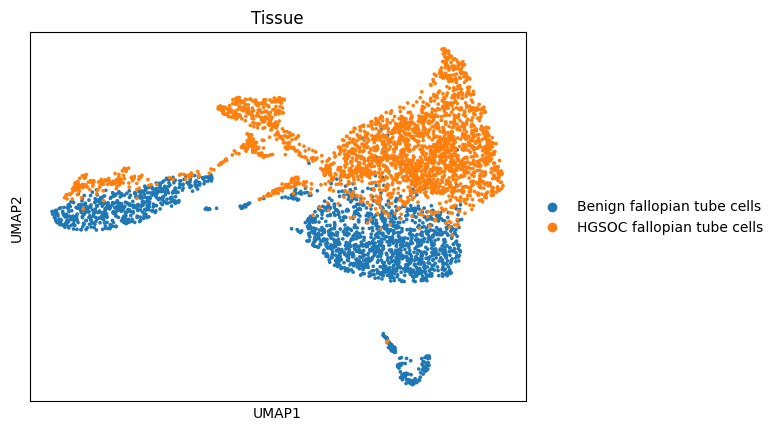

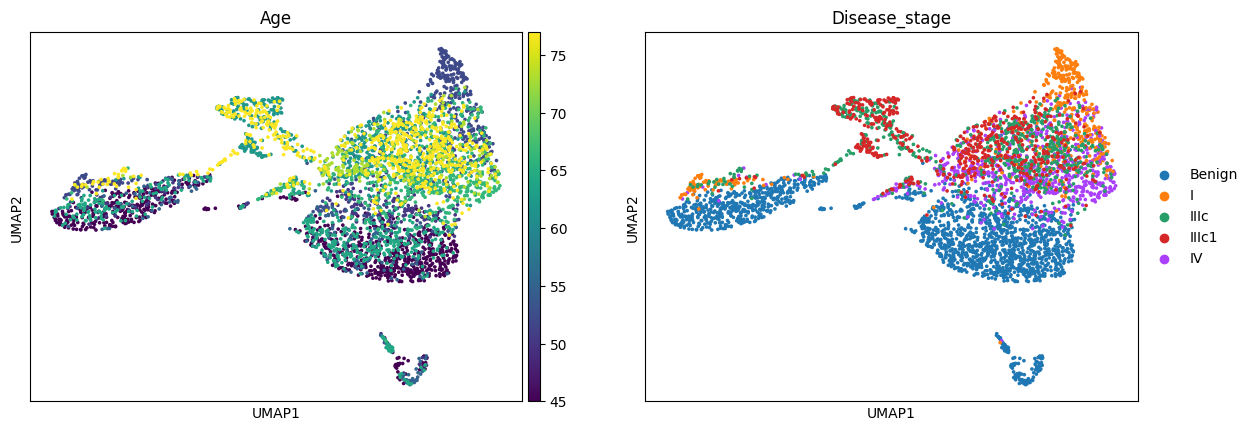

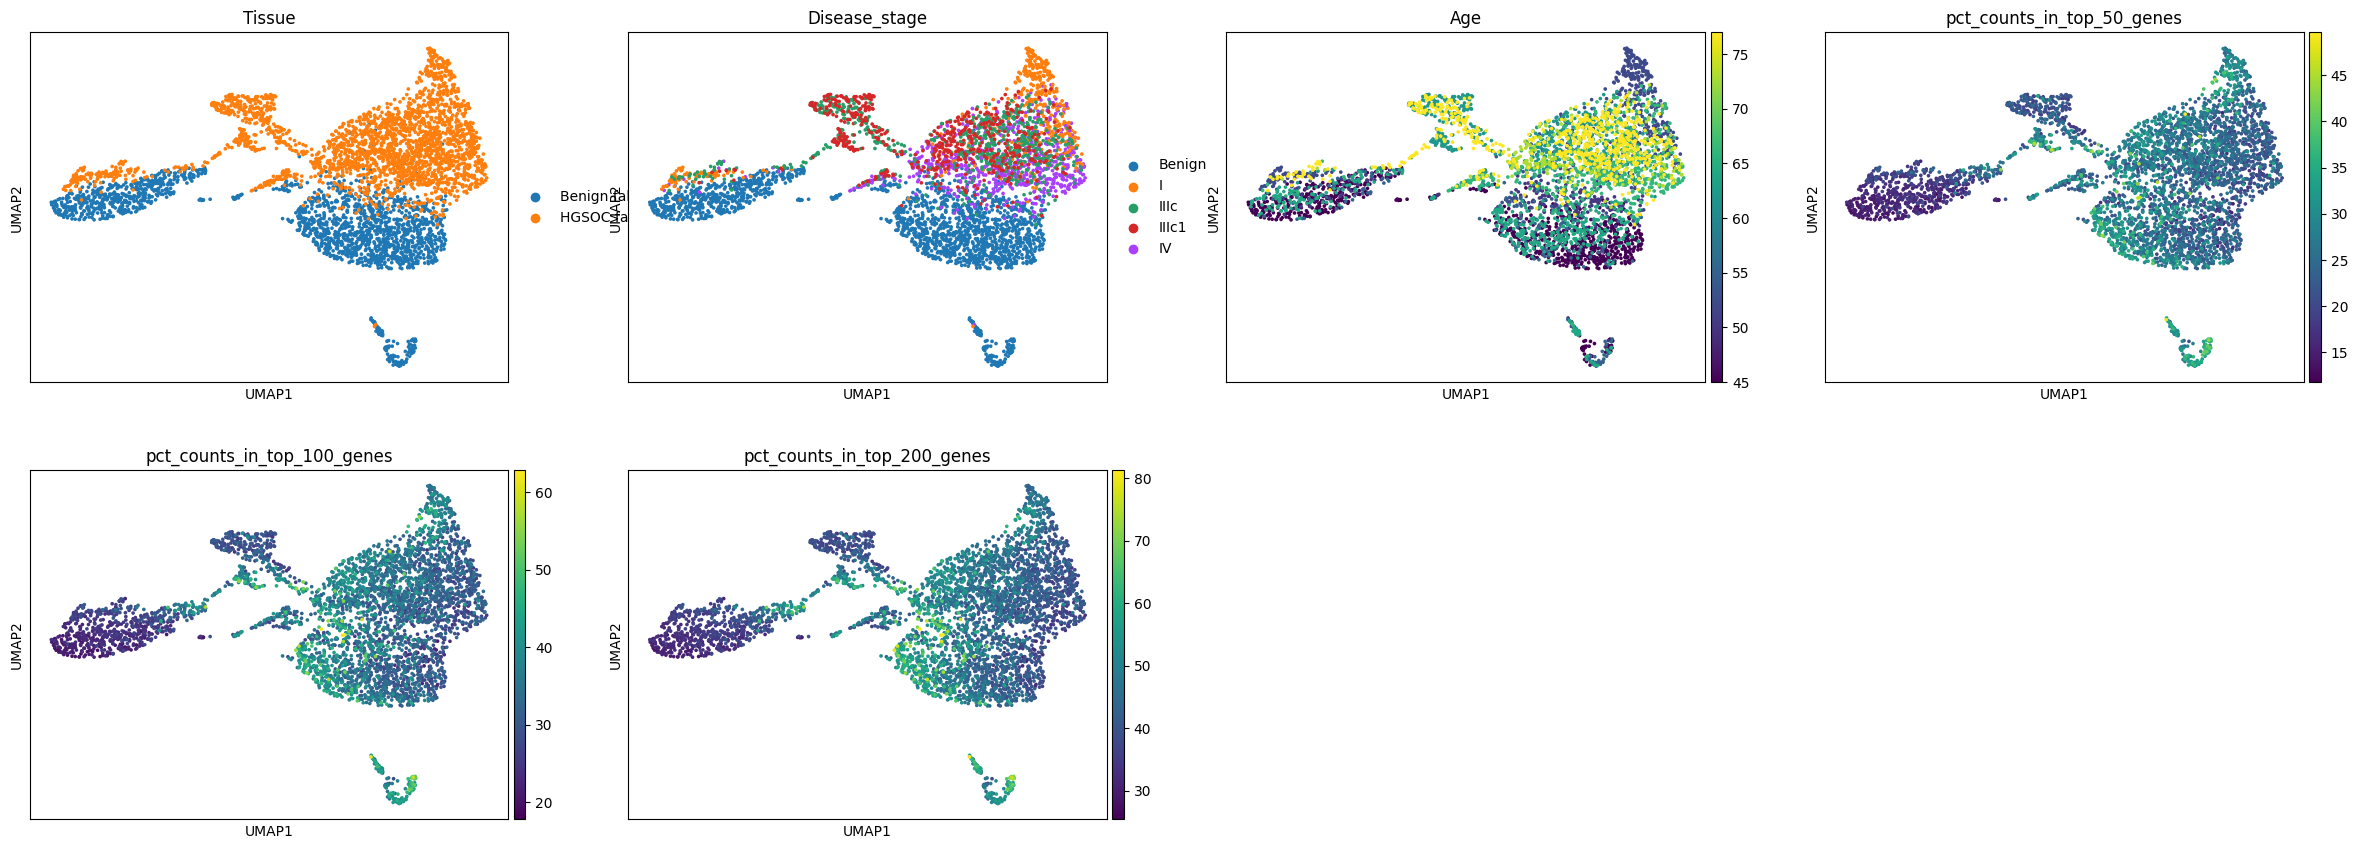

In [106]:
# Create a dictionary to map old column names to new names
column_name_mapping = {'Disease_stage': 'Disease Stage'}

sc.pl.umap(data, color=["Tissue"])
sc.pl.umap(data, color=["Age", "Disease_stage"])
sc.pl.umap(data, color=['Tissue', 'Disease_stage', 'Age', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes'])

**Assess how the UMAP structure changes for top 50 genes when you change the number of PCs used to generate the n_neighbours graph**

In [107]:
sc.pp.neighbors(data, n_pcs=4)
sc.tl.umap(data)

**Re-run the nearest neighbours graph and UMAP with optimal number of PCs**

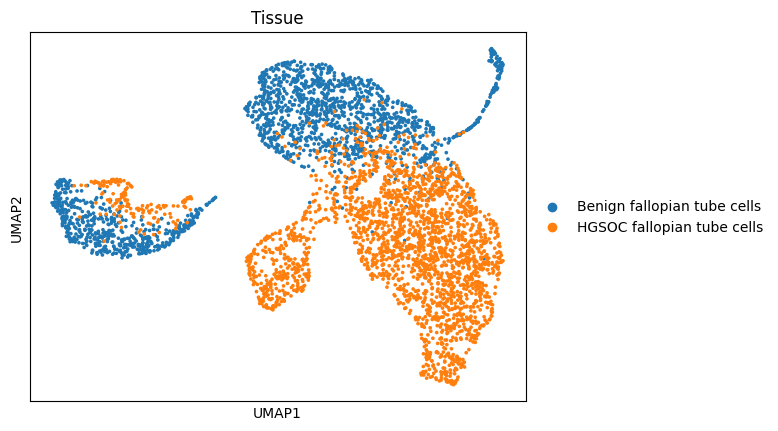

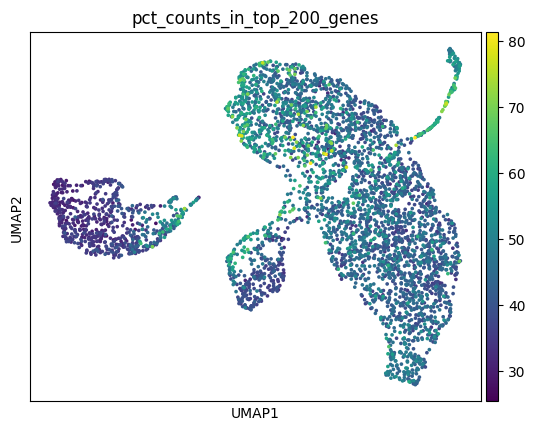

In [108]:
sc.pl.umap(data, color=["Tissue"])
sc.pl.umap(data, color=["pct_counts_in_top_200_genes"])

# **Leiden Clustering**

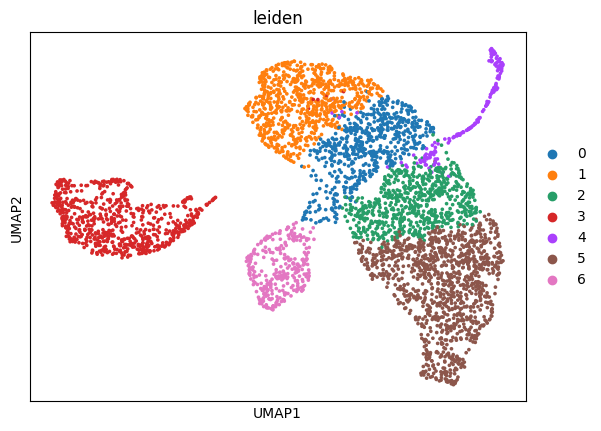

In [109]:
sc.tl.leiden(data, resolution=0.2, flavor="igraph")
sc.pl.umap(data, color=['leiden'])

**Calculate the top differentially expressed genes in each leiden cluster**

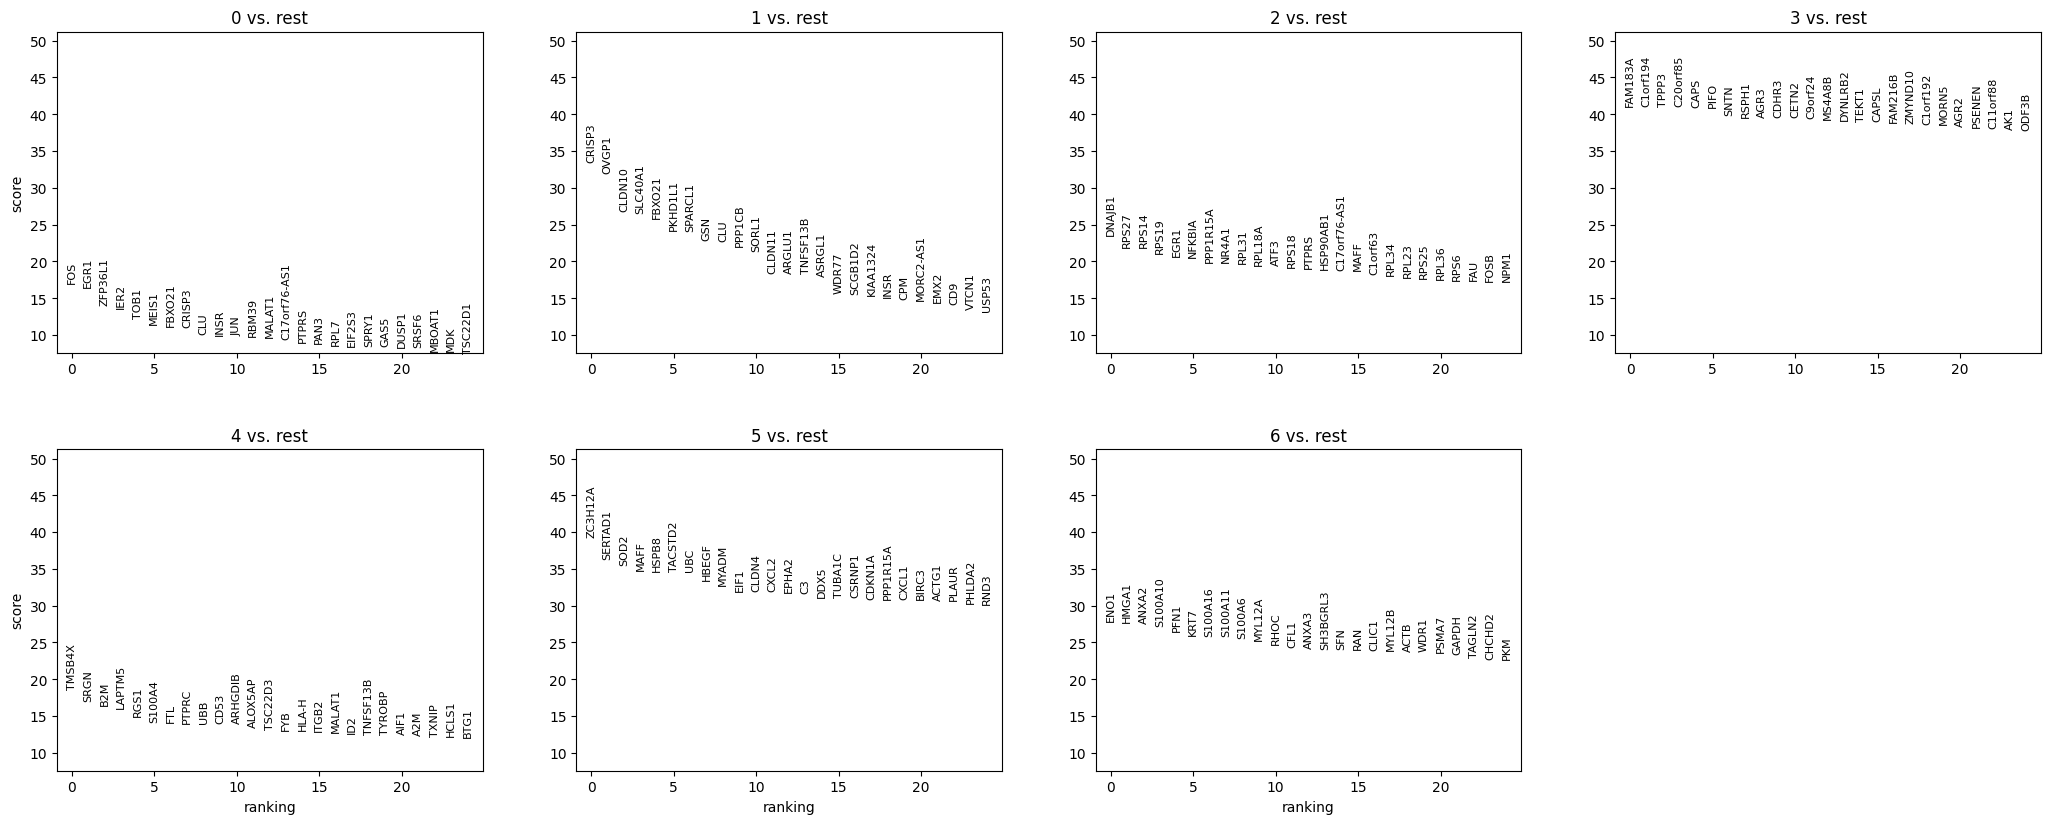

In [110]:
sc.tl.rank_genes_groups(data,'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(data, n_genes=25)

**Plot top 20 differentially expressed genes in a heatmap**

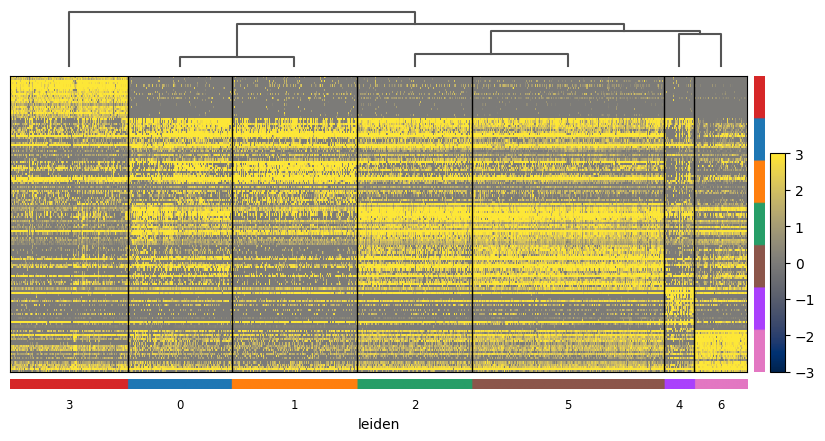

In [111]:
sc.pl.rank_genes_groups_heatmap(data, n_genes=20, swap_axes=True, show_gene_labels=False, vmin=-3, vmax=3, cmap = 'cividis' )

**Visualise marker genes to determine the cell types present in each cluster**

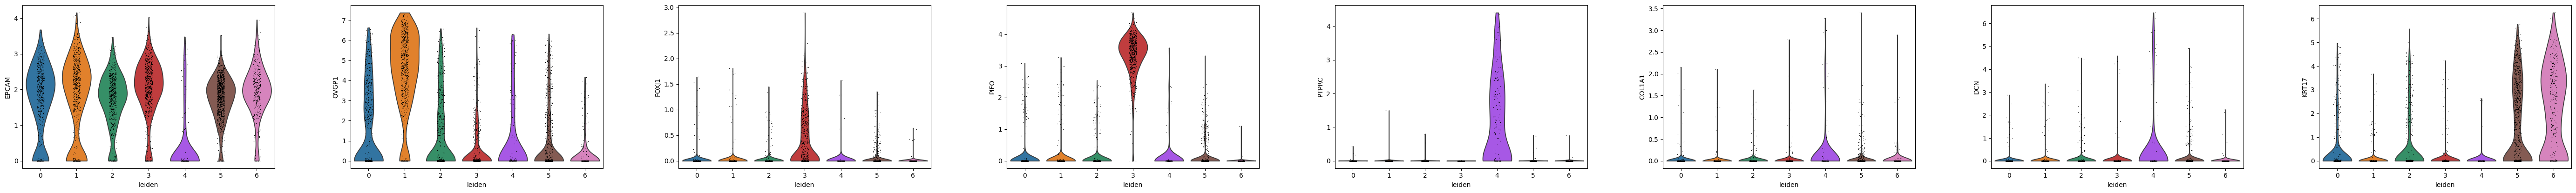

In [112]:
#sc.pl.violin(data, ['FOS','CRISP3','DNAJB1','FAM183A', 'TMSB4X','ZC3H12A','ENO1'], groupby = 'leiden')
sc.pl.violin(data, ['EPCAM','OVGP1','FOXJ1','PIFO', 'PTPRC','COL1A1','DCN','KRT17'], groupby = 'leiden')

**Resolution: 0.07:**

Leiden cluster 0 : Secretory Epithelial : OVGP1

Leiden cluster 1 : Fibroblast: COL1A1, DCN

Leiden cluster 2 : Ciliated Epithelial : FOXJ1, PIFO

Leiden cluster 3 : STIC lesion : KRT17

Leiden cluster 4 : Immune cell : PTPRC

---

**Resolution: 0.2:**

Leiden cluster 0 : Secretory Epithelial-2

Leiden cluster 1 : Secretory Epithelial-1 : OVGP1

Leiden cluster 2 : Fibroblast: COL1A1, DCN

Leiden cluster 3 : Ciliated Epithelial : FOXJ1, PIFO

Leiden cluster 4 : Immune: PTPRC

Leiden cluster 5 : Fibroblast: COL1A1, DCN

Leiden cluster 6 : STIC lesion : KRT17

**Clarify the remaining cell types represented by the leiden clusters**

Using the top marker genes for these clusters to determine what cell types they are.

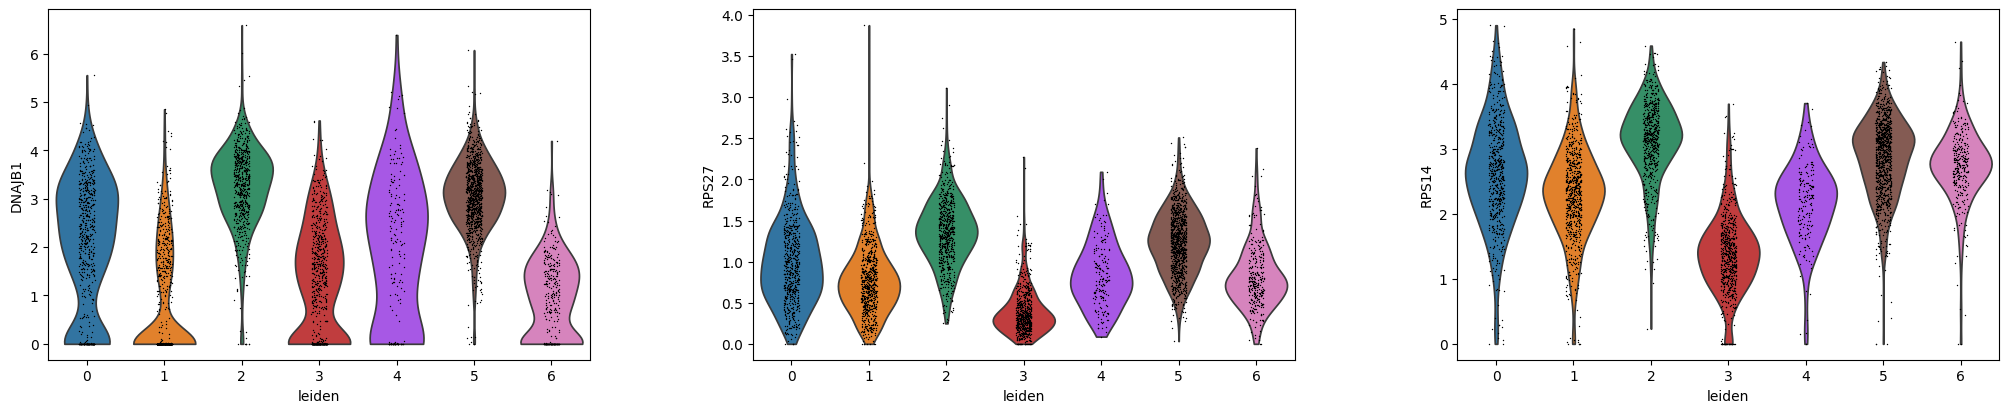

In [113]:
#sc.pl.violin(data, ['FOS','EGR1','ZFP36L1', 'IER2', 'MEIS1', 'CLDN10', 'SLC40A1', 'CRISP3','DNAJB1','FAM183A', 'TMSB4X','ZC3H12A','ENO1'], groupby = 'leiden')
#sc.pl.violin(data, ['FOS', 'CRISP3','DNAJB1','FAM183A', 'TMSB4X','ZC3H12A','ENO1'], groupby = 'leiden') # Leiden cluster 0
sc.pl.violin(data, ['DNAJB1', 'RPS27','RPS14'], groupby = 'leiden') # Leiden cluster 2
#sc.pl.violin(data, ['MEIS1','PTPRS','DDX5','FAU', 'PPP1R15A1','TUBA1C','MMP7','S100A16','HMGA1'], groupby = 'leiden')

**Resolution: 0.2:**

Leiden cluster 0 : Secretory Epithelial-2

Leiden cluster 1 : Secretory Epithelial-1 : OVGP1

Leiden cluster 2 : Fibroblast: COL1A1, DCN

Leiden cluster 3 : Ciliated Epithelial : FOXJ1, PIFO

Leiden cluster 4 : Immune: PTPRC

Leiden cluster 5 : Fibroblast: COL1A1, DCN

Leiden cluster 6 : STIC lesion : KRT17

**Create a dictionary defining Leiden clusters and their respective cell type**

In [114]:
celltypedict = {
        '0' : 'Secretory Epithelial-2',
        '1' : 'Secretory Epithelial-1',
        '2' : 'Fibroblast-1',
        '3' : 'Ciliated Epithelial',
        '4' : 'Immune',
        '5' : 'Fibroblast-2',
        '6' : 'STIC lesion'}

data.obs['Celltype'] = data.obs['leiden'].map(celltypedict)

**Plot UMAP coloured by cell types**

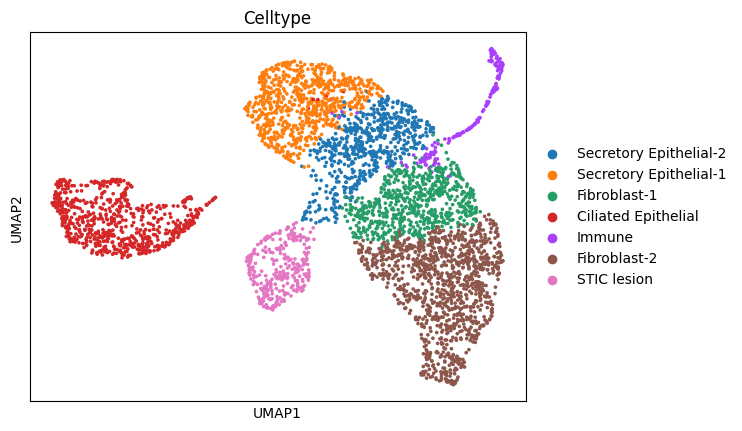

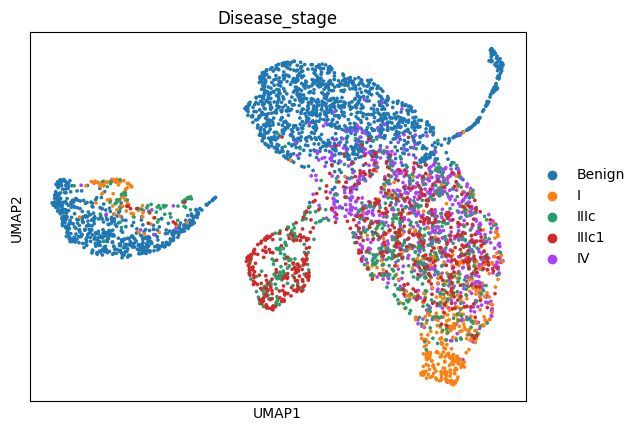

In [136]:
sc.pl.umap(data, color=['Celltype'])
sc.pl.umap(data, color=['Disease_stage'])

# **Querying GWAS catalog API**

In [116]:
import requests
import json

response=requests.get("https://www.ebi.ac.uk/gwas/rest/api/studies/GCST003588/associations")
response.json()

{'_embedded': {'associations': [{'riskFrequency': 'NR',
    'pvalueDescription': '(subset analysis)',
    'pvalueMantissa': 5,
    'pvalueExponent': -10,
    'multiSnpHaplotype': False,
    'snpInteraction': False,
    'snpType': 'novel',
    'standardError': None,
    'range': None,
    'description': None,
    'orPerCopyNum': None,
    'betaNum': None,
    'betaUnit': None,
    'betaDirection': None,
    'loci': [{'haplotypeSnpCount': None,
      'description': 'Single variant',
      'strongestRiskAlleles': [{'riskAlleleName': 'rs186507655-A',
        'riskFrequency': 'NR',
        'genomeWide': False,
        'limitedList': False,
        '_links': {'snp': {'href': 'https://www.ebi.ac.uk/gwas/rest/api/singleNucleotidePolymorphisms/rs186507655{?projection}',
          'templated': True},
         'proxySnps': {'href': 'https://www.ebi.ac.uk/gwas/rest/api/singleNucleotidePolymorphisms/NR{?projection}',
          'templated': True}}}],
      'authorReportedGenes': [{'geneName': 'Inter

**Fill the dataframe with the data from the API**

In [117]:
import pandas as pd

associations_data = response.json()['_embedded']['associations']
gwas = pd.json_normalize(associations_data, 'loci')
risk_alleles = gwas.explode('strongestRiskAlleles').explode('authorReportedGenes').reset_index(drop=True)
risk_alleles_df = pd.json_normalize(risk_alleles['strongestRiskAlleles'])
reportedgenes_df = pd.json_normalize(risk_alleles['authorReportedGenes'])
gwasgenes=pd.concat([risk_alleles_df, reportedgenes_df], axis=1)

gwasgenes = gwasgenes[['riskAlleleName', 'geneName']]
gwasgenes


riskAlleleName    geneName
0   rs186507655-A  Intergenic
1     rs2075570-T        MTX1
2      rs481519-T       NEK10
3     rs7679673-A  Intergenic
4     rs7725218-A        TERT
5     rs1862626-T  Intergenic
6   rs147680653-G  Intergenic
7   rs115707823-A  Intergenic
8   rs115392158-G       HLA-C
9   rs147527678-C  Intergenic
10    rs1011970-T      CDKN2B
11    rs1011970-T         AS1
12   rs11200014-A       FGFR2
13    rs7931342-G  Intergenic
14  rs148883465-G  Intergenic
15   rs11168936-C      TUBA1C
16   rs73110464-T        KRT8
17    rs3184504-C       SH2B3
18   rs11571818-C       BRCA2
19   rs11844632-A      RAD51B
20   rs12601991-T       HNF1B
21    rs4808075-C      BABAM1
22   rs11907546-T  Intergenic
23  rs141752671-G  Intergenic
24   rs11065979-T  Intergenic
25    rs2300206-C        RALY
26   rs56084662-A         FRY

**To plot the gene expression of carcinoma GWAS genes, convert this to a list**

In [118]:
genes=[gene for gene in gwasgenes['geneName'].tolist() if gene !='Intergenic']
genes

['MTX1',
 'NEK10',
 'TERT',
 'HLA-C',
 'CDKN2B',
 'AS1',
 'FGFR2',
 'TUBA1C',
 'KRT8',
 'SH2B3',
 'BRCA2',
 'RAD51B',
 'HNF1B',
 'BABAM1',
 'RALY',
 'FRY']

**Plot gene expression of Carcinoma GWAS genes per leiden cluster in a dot plot**

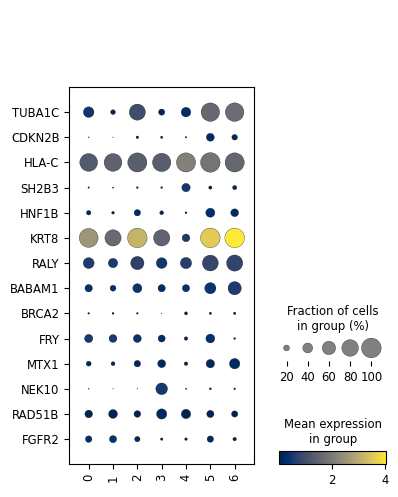

In [135]:
# Find out the GWAS genes that are not in the dataset
genes_in_data = list(set(genes).intersection(data.raw.var_names))
genes_not_in_data = list(set(genes) - set(data.raw.var_names))

# Plot gene expression of Carcinoma GWAS genes per leiden cluster in a dot plot
sc.pl.dotplot(data, genes_in_data, groupby='leiden', swap_axes=True, color_map='cividis')

#data.obs['leiden']
#data.var